Descarga de librerias

In [1]:
pip install opencv-python numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Implementacion de librerias

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Rutas y formatos

In [3]:
# Ruta a tu imagen
imagen_path = 'ImagenColor.jpg'

# cv2.imread carga en formato BGR por defecto
bgr = cv2.imread(imagen_path, cv2.IMREAD_COLOR)

# Verificamos que la imagen se haya cargado correctamente
if bgr is None:
    raise FileNotFoundError(f"No se encontró la imagen en {imagen_path}")

# Convertimos BGR → RGB
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# Convertimos BGR → HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

Canal RGB

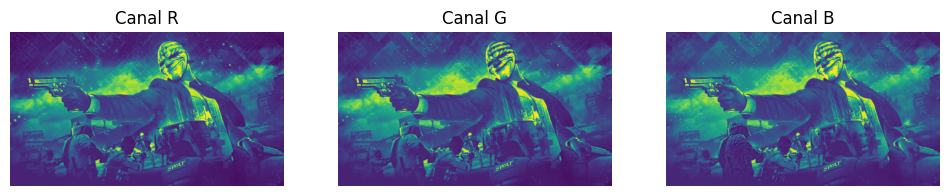

In [4]:
# Separamos canales
r_channel, g_channel, b_channel = cv2.split(rgb)

# Mostramos los tres canales
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(r_channel); axes[0].set_title('Canal R')
axes[1].imshow(g_channel); axes[1].set_title('Canal G')
axes[2].imshow(b_channel); axes[2].set_title('Canal B')
for ax in axes:
    ax.axis('off')
plt.show()


Canal HSV

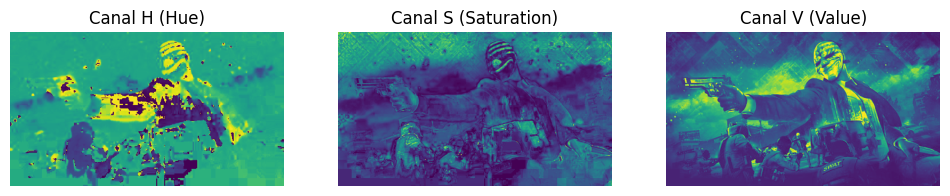

In [5]:
# Separamos canales
h_channel, s_channel, v_channel = cv2.split(hsv)

# Mostramos los tres canales HSV
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(h_channel); axes[0].set_title('Canal H (Hue)')
axes[1].imshow(s_channel); axes[1].set_title('Canal S (Saturation)')
axes[2].imshow(v_channel); axes[2].set_title('Canal V (Value)')
for ax in axes:
    ax.axis('off')
plt.show()


Cuadrado en imagen

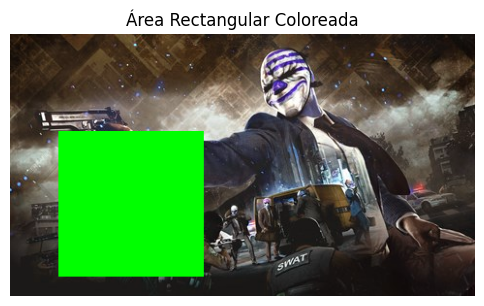

In [6]:
x1, y1 =  50, 100     # esquina superior izquierda
x2, y2 = 200, 250     # esquina inferior derecha
nuevo_color = [0, 255, 0]  # verde puro

# 4. Aplicar slicing para colorear
img_rect = bgr.copy()
img_rect[y1:y2, x1:x2] = nuevo_color

# 5. Mostrar con Matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img_rect)
plt.title('Área Rectangular Coloreada')
plt.axis('off')
plt.show()

Sustituir una región por otra parte de la imagen.

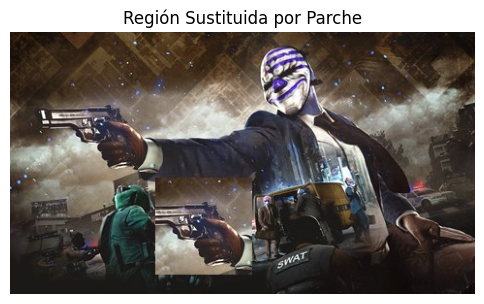

In [7]:
src_y, src_x = 50, 50      # esquina superior izquierda del parche origen
h, w = 100, 100            # alto y ancho del parche

# Comprueba límites
H, W, _ = bgr.shape
if src_y+h > H or src_x+w > W:
    raise ValueError("El parche de origen sale de los límites de la imagen")

# 4. Extraer parche (usamos .copy() para trabajar con datos propios)
patch = bgr[src_y:src_y+h, src_x:src_x+w].copy()

# 5. Definir destino y comprobar límites
dst_y, dst_x = 150, 150
if dst_y+h > H or dst_x+w > W:
    raise ValueError("La región de destino sale de los límites de la imagen")

# 6. Pegar el parche
img_patch = bgr.copy()
img_patch[dst_y:dst_y+h, dst_x:dst_x+w] = patch

# 5. Mostrar con Matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img_patch)
plt.title('Región Sustituida por Parche')
plt.axis('off')
plt.show()

histograma de intensidades

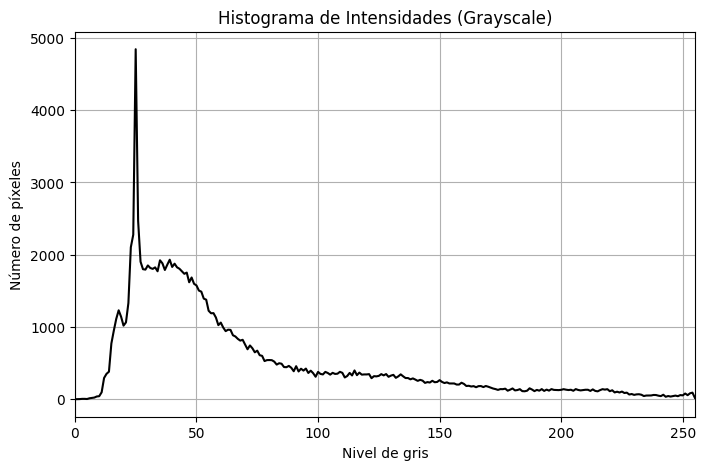

In [8]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# 4. Visualización con Matplotlib
plt.figure(figsize=(8, 5))
plt.plot(hist, color='black')
plt.title('Histograma de Intensidades (Grayscale)')
plt.xlabel('Nivel de gris')
plt.ylabel('Número de píxeles')
plt.xlim([0, 255])
plt.grid(True)
plt.show()

 brillo y contraste

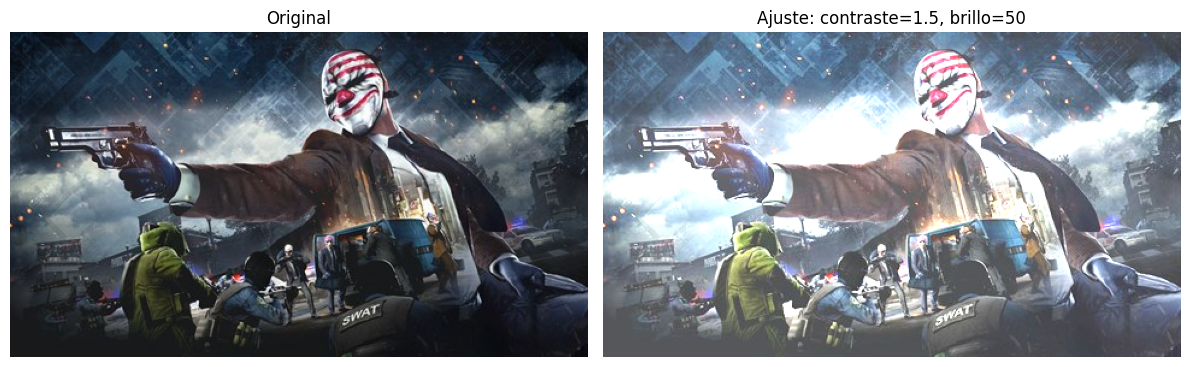

In [9]:
alpha = 1.5   # Contraste (1.0 = sin cambio)
beta  =  50   # Brillo  (0 = sin cambio)

# 4. Aplicación manual del ajuste
# Convertimos a float para evitar clipping prematuro
adjusted = rgb.astype(np.float32) * alpha + beta
# Clip de valores al rango [0,255] y vuelta a uint8
adjusted = np.clip(adjusted, 0, 255).astype(np.uint8)

# 5. Mostrar original vs ajustada
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(rgb)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(adjusted)
ax[1].set_title(f'Ajuste: contraste={alpha}, brillo={beta}')
ax[1].axis('off')

plt.tight_layout()
plt.show()

Bonus Brillo y Contraste Interactivo(El error sale cuando se cierra)

In [10]:
def nothing(x):
    """Callback vacío requerido por createTrackbar."""
    pass
cv2.namedWindow('Ajuste Brillo/Contraste')

# Trackbar 'Alpha' va de 0 a 300 → mapeamos luego a [0.0, 3.0]
cv2.createTrackbar('Brillo', 'Ajuste Brillo/Contraste', 100, 300, nothing)
# Trackbar 'Beta' va de -100 a +100 → desplazamos cero al medio
cv2.createTrackbar('Contraste',      'Ajuste Brillo/Contraste', 100, 200, nothing)

while True:
    # 3. Leer posiciones de los sliders
    alpha = cv2.getTrackbarPos('Brillo', 'Ajuste Brillo/Contraste') / 100.0
    beta  = cv2.getTrackbarPos('Contraste',       'Ajuste Brillo/Contraste') - 100

    # 4. Aplicar transformación lineal: result = α·img + β
    #    Usamos convertScaleAbs para remapear y recortar a [0,255]
    adjusted = cv2.convertScaleAbs(bgr, alpha=alpha, beta=beta)

    # 5. Mostrar resultado
    cv2.imshow('Ajuste Brillo/Contraste', adjusted)

    # 6. Salir con la tecla 'Esc'
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2564: error: (-27:Null pointer) NULL window: 'Ajuste Brillo/Contraste' in function 'cvGetTrackbarPos'
